In [1]:
import pandas as pd
import numpy as np

import networkx as nx

In [14]:
# read graph from hyperlinks2.csv file
df = pd.read_csv('data/hyperlinks2.csv', sep='\t')

edges = df.values[:, 0:2]

In [27]:
# find unique nodes
nodes = np.unique(edges)

# create a graph
G = nx.MultiDiGraph()

# add nodes to the graph
G.add_nodes_from(nodes)

# add edges to the graph
G.add_edges_from(edges)

# find the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')

# find the degree distribution
degree_distribution = nx.degree_histogram(G)
print(f'Degree distribution: {degree_distribution}')
plot = nx.degree_histogram(G)

# find the average degree
average_degree = np.mean(list(dict(G.degree()).values()))
print(f'Average degree: {average_degree}')

# find the number of strongly connected components
num_strongly_connected_components = nx.number_strongly_connected_components(G)
print(f'Number of strongly connected components: {num_strongly_connected_components}')


07thexpansion
Number of nodes: 24568
Number of edges: 186109
Degree distribution: [0, 10926, 3817, 1921, 1246, 863, 617, 482, 403, 335, 291, 227, 229, 161, 159, 143, 106, 113, 109, 91, 93, 81, 72, 58, 57, 58, 69, 66, 51, 46, 54, 44, 48, 45, 44, 32, 31, 44, 30, 25, 36, 25, 27, 31, 27, 15, 19, 23, 23, 17, 23, 21, 18, 21, 11, 10, 11, 10, 7, 13, 12, 13, 19, 11, 13, 15, 13, 11, 9, 11, 14, 12, 12, 5, 7, 10, 8, 6, 11, 9, 6, 4, 10, 11, 6, 7, 3, 11, 10, 9, 4, 8, 2, 8, 5, 0, 12, 4, 7, 7, 7, 4, 4, 8, 3, 5, 4, 4, 3, 5, 3, 5, 3, 5, 8, 3, 1, 9, 4, 4, 8, 3, 4, 0, 4, 2, 2, 3, 0, 4, 5, 3, 3, 5, 2, 2, 6, 4, 2, 1, 3, 2, 0, 1, 2, 1, 1, 0, 6, 3, 5, 3, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 3, 2, 5, 2, 1, 1, 4, 3, 3, 4, 1, 2, 3, 3, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1, 4, 2, 3, 0, 4, 4, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 3, 2, 0, 1, 1, 0, 4, 1, 1, 1, 1, 0, 4, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 1

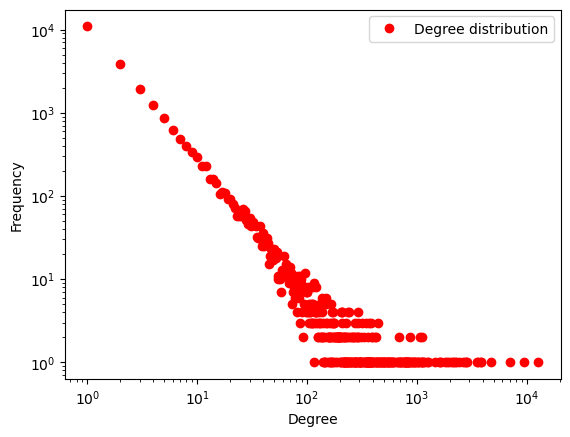

Linear on log-log scale, so the degrees obey power law


In [28]:
# Checking if degrees obey power law

import matplotlib.pyplot as plt
from scipy.stats import powerlaw

# get the degree distribution
degree_distribution = nx.degree_histogram(G)

# remove the first element
degree_distribution = degree_distribution[1:]

# get the x values
x = np.arange(1, len(degree_distribution) + 1)

# fit the power law

# plot the degree distribution
plt.plot(x, degree_distribution, 'ro', label='Degree distribution')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()
plt.show()

print("Plot is linear on the log-log scale, so the degrees obey power law")

In [30]:
# Printing the most important nodes
import operator

# find the degree centrality
degree_centrality = nx.degree_centrality(G)

# find the top 10 nodes with the highest degree centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse=True)

print('Top 10 nodes with the highest degree centrality:')
for i in range(10):
    print(f'{sorted_degree_centrality[i][0]}: {sorted_degree_centrality[i][1]}')
    
    
# find the closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# find the top 10 nodes with the highest closeness centrality
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=operator.itemgetter(1), reverse=True)

print('Top 10 nodes with the highest closeness centrality:')
for i in range(10):
    print(f'{sorted_closeness_centrality[i][0]}: {sorted_closeness_centrality[i][1]}')


Top 10 nodes with the highest degree centrality:
subredditdrama: 0.5158138966906826
bestof: 0.385191517075752
askreddit: 0.2890055765864778
iama: 0.19115073065494362
funny: 0.15683640656164774
pics: 0.1567957015508609
todayilearned: 0.14767777913461147
titlegore: 0.14275247282940529
worldnews: 0.11584646069931208
videos: 0.11311922497659462
Top 10 nodes with the highest closeness centrality:
iama: 0.3161835959719294
askreddit: 0.3074645841095938
pics: 0.27784290724854654
funny: 0.2724121730997956
videos: 0.26492642041714093
todayilearned: 0.261969885423818
wtf: 0.24996783312859644
gaming: 0.24919460992017484
science: 0.24597815431342374
news: 0.2457166991502096
